### Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy.stats import shapiro, levene

mental_health = pd.read_csv('student_mental_health.csv')
mental_health = mental_health.rename(columns={
    "Choose your gender" : "Gender",
    "What is your course?" : "Course",
    "Your current year of Study" : "Year_of_Study",
    "What is your CGPA?": "CGPA",
    "Marital status" : "Marital_status",
    "Do you have Depression?": "Depression",
    "Do you have Anxiety?": "Anxiety",
    "Do you have Panic attack?": "Panic_Attack",
    "Did you seek any specialist for a treatment?": "Treatment"
})

mental_health

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


### EDA




In [3]:
print(mental_health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Course          101 non-null    object 
 4   Year_of_Study   101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital_status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic_Attack    101 non-null    object 
 10  Treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB
None


In [4]:
print("\nJumlah data tiap grup (Gender × Anxiety):")
mental_health.groupby(["Gender","Anxiety"]).describe()



Jumlah data tiap grup (Gender × Anxiety):


Age                                                    
               count       mean       std   min   25%   50%    75%   max
Gender Anxiety                                                          
Female No       51.0  20.568627  2.539724  18.0  18.0  19.0  23.00  24.0
       Yes      24.0  20.458333  2.519130  18.0  18.0  19.5  23.25  24.0
Male   No       15.0  21.133333  2.356349  18.0  19.0  21.0  23.00  24.0
       Yes      10.0  19.600000  2.503331  18.0  18.0  18.0  20.50  24.0

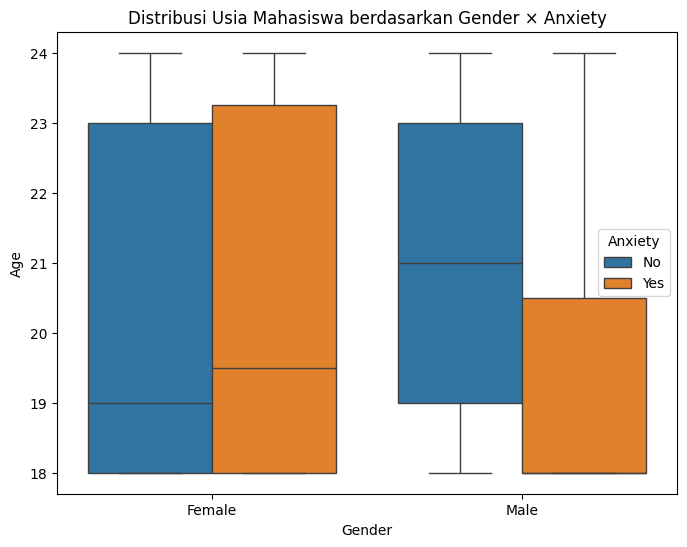

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="Age", hue="Anxiety", data=mental_health)

plt.title("Distribusi Usia Mahasiswa berdasarkan Gender × Anxiety")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.legend(title="Anxiety")
plt.show()


In [6]:
# Cek jumlah data tiap grup kombinasi
print(mental_health.groupby(["Gender", "Anxiety"])["CGPA"].count())

# Cek apakah masih ada NaN
print(mental_health["CGPA"].isna().sum())

Gender  Anxiety
Female  No         51
        Yes        24
Male    No         16
        Yes        10
Name: CGPA, dtype: int64
0


### Preprocesss

In [7]:
# normalisasi sebelum mapping (hilangkan spasi berlebih)
mental_health["CGPA"] = mental_health["CGPA"].str.strip()  
mental_health["Gender"] = mental_health["Gender"].str.strip()  
mental_health["Anxiety"] = mental_health["Anxiety"].str.strip()  

# mapping
mental_health["CGPA_cat"] = mental_health["CGPA"].map({
    "0 - 1.99": 0.995,
    "2.00 - 2.49": 2.245,
    "2.50 - 2.99": 2.745,
    "3.00 - 3.49": 3.245,
    "3.50 - 4.00": 3.75
})

mental_health["Gender_cat"] = mental_health["Gender"].map({
    "Female": 0,
    "Male": 1
})

mental_health["Anxiety_cat"] = mental_health["Anxiety"].map({
    "No": 0,
    "Yes": 1
})

# cek
print(mental_health[["CGPA", "CGPA_cat"]].head(5))
print()
print(mental_health[["Gender", "Gender_cat"]].head(5))
print()
print(mental_health[["Anxiety", "Anxiety_cat"]].head(5))


          CGPA  CGPA_cat
0  3.00 - 3.49     3.245
1  3.00 - 3.49     3.245
2  3.00 - 3.49     3.245
3  3.00 - 3.49     3.245
4  3.00 - 3.49     3.245

   Gender  Gender_cat
0  Female           0
1    Male           1
2    Male           1
3  Female           0
4    Male           1

  Anxiety  Anxiety_cat
0      No            0
1     Yes            1
2     Yes            1
3      No            0
4      No            0


#### hapus missing value

In [8]:
# Drop missing value hanya di kolom CGPA_cat
clean_mental_health = mental_health.dropna(subset=["CGPA_cat"]).copy()

# Pastikan CGPA_cat numeric (bukan string/label)
clean_mental_health["CGPA_cat"] = clean_mental_health["CGPA_cat"].astype(float)


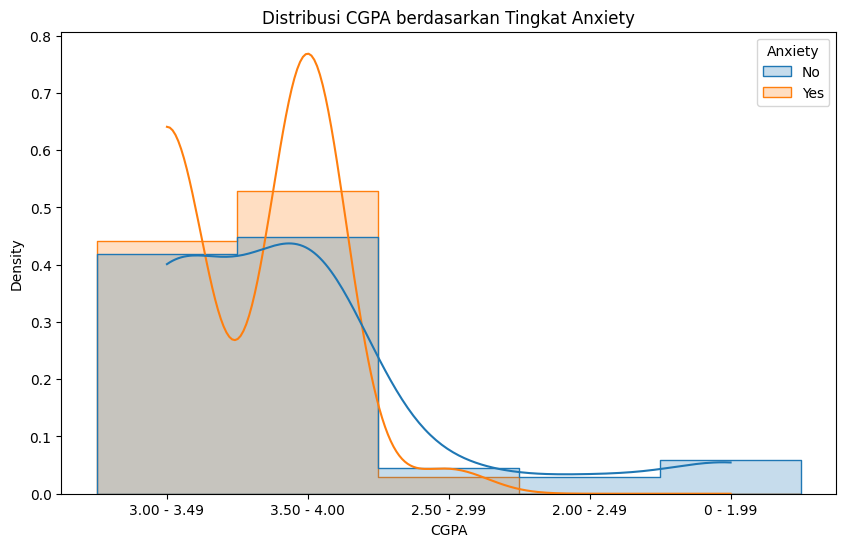

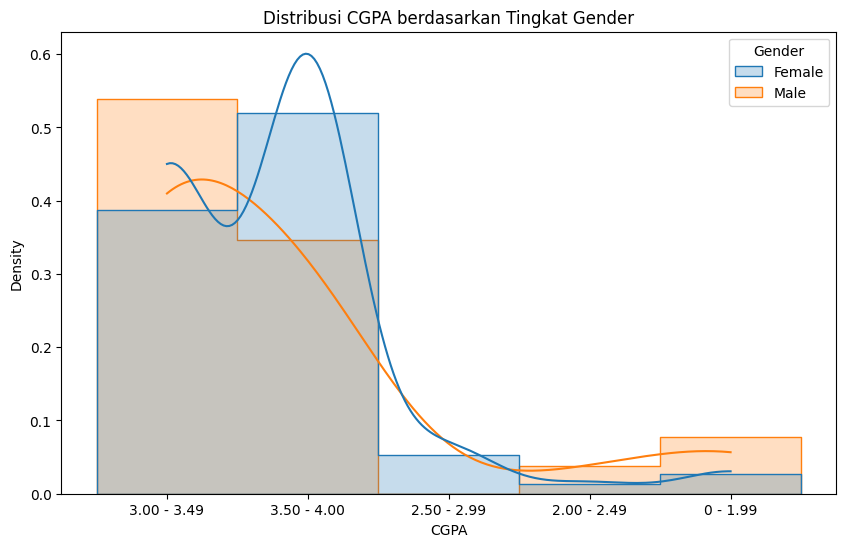

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=mental_health, x="CGPA", hue="Anxiety", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribusi CGPA berdasarkan Tingkat Anxiety")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=mental_health, x="CGPA", hue="Gender", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribusi CGPA berdasarkan Tingkat Gender")
plt.show()

In [11]:
# Timpa kolom lama dengan hasil cleaning
clean_mental_health["CGPA"] = clean_mental_health["CGPA_cat"]
clean_mental_health["Gender"] = clean_mental_health["Gender_cat"]
clean_mental_health["Anxiety"] = clean_mental_health["Anxiety_cat"]

# Hapus kolom tambahan
clean_mental_health = clean_mental_health.drop(columns=["CGPA_cat"])
clean_mental_health = clean_mental_health.drop(columns=["Gender_cat"])
clean_mental_health = clean_mental_health.drop(columns=["Anxiety_cat"])

# print(mental_health.info())
clean_mental_health

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.245,No,Yes,0,Yes,No
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.245,No,No,1,No,No
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.245,No,Yes,1,Yes,No
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.245,Yes,Yes,0,No,No
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.245,No,No,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,0,21.0,BCS,year 1,3.750,No,No,1,No,No
97,13/07/2020 21:21:42,1,18.0,Engineering,Year 2,3.245,No,Yes,1,No,No
98,13/07/2020 21:22:56,0,19.0,Nursing,Year 3,3.750,Yes,Yes,0,Yes,No
99,13/07/2020 21:23:57,0,23.0,Pendidikan Islam,year 4,3.750,No,No,0,No,No


### Uji asumsi

Normalitas residual: Shapiro-Wilk.

Homogenitas varians: Levene.

In [12]:
# model
model = ols("CGPA ~ C(Gender) * C(Anxiety)", data=clean_mental_health).fit()
residuals = model.resid

# Uji normalitas residual
shapiro_test = shapiro(residuals)
print(f"\nShapiro-Wilk Test: Statistik {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")


# Uji homogenitas varians
levene_test = levene(
    *[group["CGPA"].values for name, group in clean_mental_health.groupby(["Gender", "Anxiety"])]
)
print(f"Levene Test: Statistik = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")


Shapiro-Wilk Test: Statistik 0.7356, p-value = 0.0000
Levene Test: Statistik = 1.4696, p-value = 0.2276


### Visualisasi normalitas residual

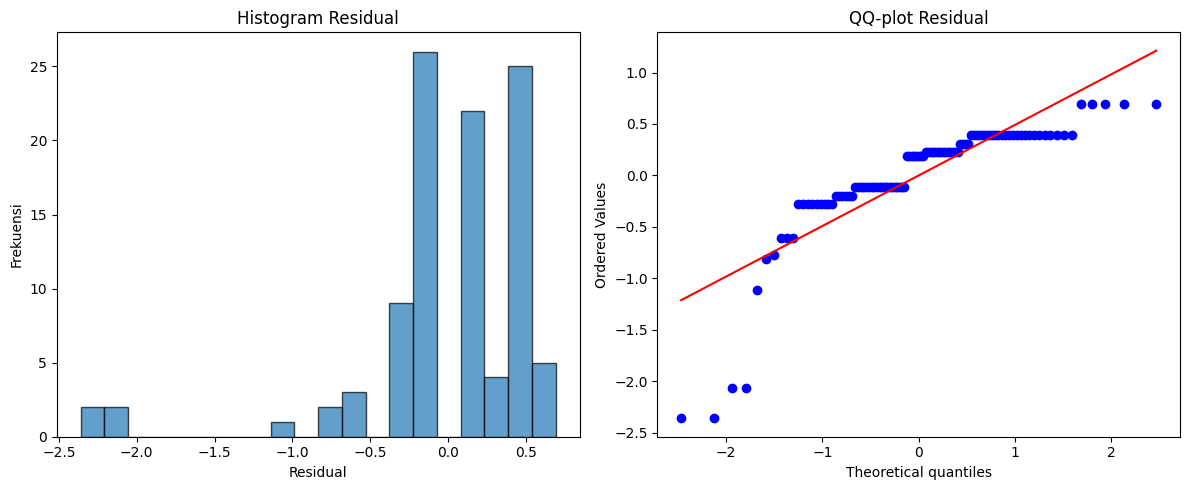

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residual dari model
residuals = model.resid

# Histogram residual
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram Residual")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")

# QQ-plot residual
plt.subplot(1,2,2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot Residual")

plt.tight_layout()
plt.show()


### Solusi transformasi data karena tidak normal

In [15]:
import numpy as np
from scipy.stats import boxcox

# Transformasi log
clean_mental_health["CGPA_log"] = np.log(clean_mental_health["CGPA"])

# Transformasi sqrt
clean_mental_health["CGPA_sqrt"] = np.sqrt(clean_mental_health["CGPA"])


### Pengecekan

In [16]:
# pengecekan
model_log = ols("CGPA_log ~ C(Gender) * C(Anxiety)", data=clean_mental_health).fit()
model_sqrt = ols("CGPA_sqrt ~ C(Gender) * C(Anxiety)", data=clean_mental_health).fit()

from scipy.stats import shapiro

for name, model in [("Log", model_log), ("Sqrt", model_sqrt)]:
    stat, p = shapiro(model.resid)
    print(f"{name} Transform - Shapiro-Wilk: Statistik={stat:.4f}, p-value={p:.4f}")



Log Transform - Shapiro-Wilk: Statistik=0.5887, p-value=0.0000
Sqrt Transform - Shapiro-Wilk: Statistik=0.6634, p-value=0.0000


### One Way Anova

In [18]:
# One-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# depression
model_oneway = ols("CGPA ~ C(Depression)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("Hasil One-Way ANOVA (Depression vs CGPA):")
print(anova_oneway)

# gender
model_oneway = ols("CGPA ~ C(Gender)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Gender vs CGPA):")
print(anova_oneway)

# anxiety
model_oneway = ols("CGPA ~ C(Anxiety)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Anxiety vs CGPA):")
print(anova_oneway)

# treatment
model_oneway = ols("CGPA ~ C(Treatment)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Treatment vs CGPA):")
print(anova_oneway)

# Year_of_Study
model_oneway = ols("CGPA ~ C(Year_of_Study)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Year_of_Study vs CGPA):")
print(anova_oneway)

# Panic_Attack
model_oneway = ols("CGPA ~ C(Panic_Attack)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Panic_Attack vs CGPA):")
print(anova_oneway)

# Age
model_oneway = ols("CGPA ~ C(Age)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Age vs CGPA):")
print(anova_oneway)

# Marital_status
model_oneway = ols("CGPA ~ C(Marital_status)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Marital_status vs CGPA):")
print(anova_oneway)

# Course
model_oneway = ols("CGPA ~ C(Course)", data=clean_mental_health).fit()
anova_oneway = sm.stats.anova_lm(model_oneway, typ=2)

print("\nHasil One-Way ANOVA (Course vs CGPA):")
print(anova_oneway)


Hasil One-Way ANOVA (Depression vs CGPA):
                  sum_sq    df         F    PR(>F)
C(Depression)   0.059847   1.0  0.173341  0.678061
Residual       34.180485  99.0       NaN       NaN

Hasil One-Way ANOVA (Gender vs CGPA):
              sum_sq    df         F    PR(>F)
C(Gender)   0.767118   1.0  2.268818  0.135185
Residual   33.473215  99.0       NaN       NaN

Hasil One-Way ANOVA (Anxiety vs CGPA):
               sum_sq    df         F    PR(>F)
C(Anxiety)   1.024184   1.0  3.052559  0.083711
Residual    33.216148  99.0       NaN       NaN

Hasil One-Way ANOVA (Treatment vs CGPA):
                 sum_sq    df        F    PR(>F)
C(Treatment)   0.021990   1.0  0.06362  0.801387
Residual      34.218343  99.0      NaN       NaN

Hasil One-Way ANOVA (Year_of_Study vs CGPA):
                     sum_sq    df        F    PR(>F)
C(Year_of_Study)   0.897843   6.0  0.42187  0.862785
Residual          33.342490  94.0      NaN       NaN

Hasil One-Way ANOVA (Panic_Attack vs CGPA):
  

### Two-Way Anova

Variabel Gender & Anxiety

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Two-Way ANOVA
model_GA = smf.ols("CGPA ~ C(Gender) + C(Anxiety) + C(Gender):C(Anxiety)", data=clean_mental_health).fit()
anovaGA = sm.stats.anova_lm(model_GA, typ=3)
print(anovaGA)


                          sum_sq    df            F        PR(>F)
Intercept             574.157929   1.0  1734.397105  1.077665e-63
C(Gender)               1.068755   1.0     3.228460  7.548109e-02
C(Anxiety)              0.436035   1.0     1.317160  2.539251e-01
C(Gender):C(Anxiety)    0.225191   1.0     0.680249  4.115245e-01
Residual               32.111054  97.0          NaN           NaN


Variabel Depression & Anxiety

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Two-Way ANOVA
model_DA = smf.ols("CGPA ~ C(Depression) + C(Anxiety) + C(Depression):C(Anxiety)", data=clean_mental_health).fit()
anova_DA = sm.stats.anova_lm(model_DA, typ=3)
print(anova_DA)


                              sum_sq    df            F        PR(>F)
Intercept                 533.827812   1.0  1567.278958  1.119866e-61
C(Depression)               0.057301   1.0     0.168230  6.825941e-01
C(Anxiety)                  1.041482   1.0     3.057714  8.351820e-02
C(Depression):C(Anxiety)    0.176032   1.0     0.516818  4.739303e-01
Residual                   33.038980  97.0          NaN           NaN


Variabel Depression & Gender

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Two-Way ANOVA
model_DG = smf.ols("CGPA ~ C(Depression) + C(Gender) + C(Depression):C(Gender)", data=clean_mental_health).fit()
anova_DG = sm.stats.anova_lm(model_DG, typ=3)
print(anova_DG)

                             sum_sq    df            F        PR(>F)
Intercept                535.199544   1.0  1556.285972  1.544697e-61
C(Depression)              0.001358   1.0     0.003948  9.500285e-01
C(Gender)                  0.796087   1.0     2.314911  1.313919e-01
C(Depression):C(Gender)    0.100862   1.0     0.293292  5.893606e-01
Residual                  33.357851  97.0          NaN           NaN


Variabel Depression & Treatment

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Two-Way ANOVA
model_DT = smf.ols("CGPA ~ C(Depression) + C(Treatment) + C(Depression):C(Treatment)", data=clean_mental_health).fit()
anova_DT = sm.stats.anova_lm(model_DT, typ=2)
print(anova_DT)

                                  sum_sq    df             F    PR(>F)
C(Depression)               5.984727e-02   1.0  1.716133e-01  0.679587
C(Treatment)               -2.792735e-15   1.0 -8.008226e-15  1.000000
C(Depression):C(Treatment)  4.629901e-03   1.0  1.327634e-02  0.908504
Residual                    3.417586e+01  98.0           NaN       NaN


In [29]:
print (model_GA.summary())

                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.144
Date:                Tue, 16 Sep 2025   Prob (F-statistic):             0.0996
Time:                        18:41:21   Log-Likelihood:                -85.444
No. Observations:                 101   AIC:                             178.9
Df Residuals:                      97   BIC:                             189.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Post hoc analysis (jika anova signifikan)

- meandiff = selisih rata-rata CGPA.
- p-adj = p-value hasil Tukey.
- reject = True artinya signifikan beda, False artinya tidak beda signifikan.

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Asumsi: mental_health sudah bersih dan CGPA sudah numerik (float)
# Post-hoc Tukey HSD untuk faktor Gender
# menggunakan CGPA nilai tengah
tukey1 = pairwise_tukeyhsd(endog=clean_mental_health["CGPA"],
                          groups=clean_mental_health["Gender"],
                          alpha=0.05)
tukey2 = pairwise_tukeyhsd(endog=clean_mental_health["CGPA"],
                          groups=clean_mental_health["Anxiety"],
                          alpha=0.05)
print(tukey1)
print(tukey2)
print()
print('><'*25)
print()

# menggunakan CGPA yang sudah di transformasi sqrt
tukey11 = pairwise_tukeyhsd(endog=clean_mental_health["CGPA_sqrt"],
                          groups=clean_mental_health["Gender"],
                          alpha=0.05)
tukey22 = pairwise_tukeyhsd(endog=clean_mental_health["CGPA_sqrt"],
                          groups=clean_mental_health["Anxiety"],
                          alpha=0.05)
print(tukey11)
print(tukey22)
print()
print('><'*25)
print()

# menggunakan CGPA yang sudah di transformasi log
tukey111 = pairwise_tukeyhsd(endog=clean_mental_health["CGPA_log"],
                          groups=clean_mental_health["Gender"],
                          alpha=0.05)
tukey222 = pairwise_tukeyhsd(endog=clean_mental_health["CGPA_log"],
                          groups=clean_mental_health["Anxiety"],
                          alpha=0.05)
print(tukey111)
print(tukey222)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1993 0.1352 -0.4619 0.0633  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2131 0.0837 -0.0289 0.4551  False
---------------------------------------------------

><><><><><><><><><><><><><><><><><><><><><><><><><

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0402 0.1447 -0.0945 0.0141  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     

### Visualisasi

### Interpretasi